# Loan Default Probability
we use a classification-based machine learning techniques algorithm to predict whether a loan will default. The case study focuses on various techniques and concepts of data processing, feature selection, exploratory analysis, model training and Validation.

The goal of this case study is to build a machine learning model to predict the probability that a loan will default.

The Machine Learning Models

    
    1. DecisionTreeClassifier 




In [96]:
#Packages for data loading, data analysis, and data preparation
#importing libraries
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#from imblearn.over_sampling import SMOTE

#Packages for model evaluation and classification models
from sklearn.model_selection import train_test_split, KFold,cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#from xgboost import XGBClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
# Hyperparameter tuning
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
#from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval


In [97]:
# load dataset
dataset = pd.read_csv('train.csv')
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [98]:
# drop loan_ID
dataset.drop('Loan_ID', axis = 1, inplace = True)

# Data Dictionary
There are 13 variables in this data set:
8 categorical variables,
4 continuous variables, and
1 variable to accommodate the loan ID.
The following is the structure of the data set.
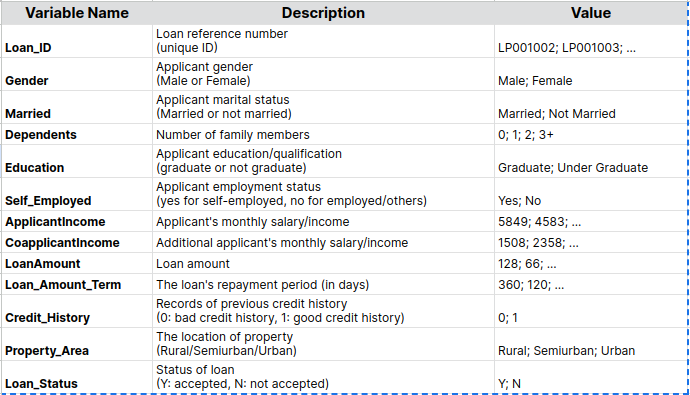


# Exploratory data analysis

In [99]:
print("Check the data shape(rows, columns). it has 614 rows and 12 columns. That’s 12 features.")
dataset.shape

Check the data shape(rows, columns). it has 614 rows and 12 columns. That’s 12 features.


(614, 12)

In [100]:
# Now we check the data types and other information.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


# Feature selection—limit the feature space
The full dataset has 12 features for each loan, but not all features contribute to the prediction variable. 
Removing features of low importance can improve accuracy and reduce both model complexity and overfitting. 
Training time can also be reduced for very large datasets. 

Eliminating features that have more than 30% missing values.

In [101]:
#Feature elimination based on significant missing values
#First, we calculate the percentage of missing data for each feature:
print("This dataset has 12 features and the missing values is less than 30%, so the number of features  remain the same.")
missing_fractions = dataset.isnull().mean().sort_values(ascending=False)
print(missing_fractions)
#Drop the missing fraction
drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))
dataset.drop(labels=drop_list, axis=1, inplace=True)
dataset.shape

This dataset has 12 features and the missing values is less than 30%, so the number of features  remain the same.
Credit_History       0.081433
Self_Employed        0.052117
LoanAmount           0.035831
Dependents           0.024430
Loan_Amount_Term     0.022801
Gender               0.021173
Married              0.004886
Education            0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


(614, 12)

In [102]:
categorical_columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Credit_History','Loan_Amount_Term']
numerical_columns=['ApplicantIncome','CoapplicantIncome','LoanAmount'] 
print(categorical_columns)
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [103]:
for column in categorical_columns:
    dataset[column].fillna(dataset[column].mode()[0],inplace=True)
for column in numerical_columns:
    dataset[column].fillna(dataset[column].median(),inplace=True)

In [104]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [105]:
dataset.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [106]:
obj = (dataset.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


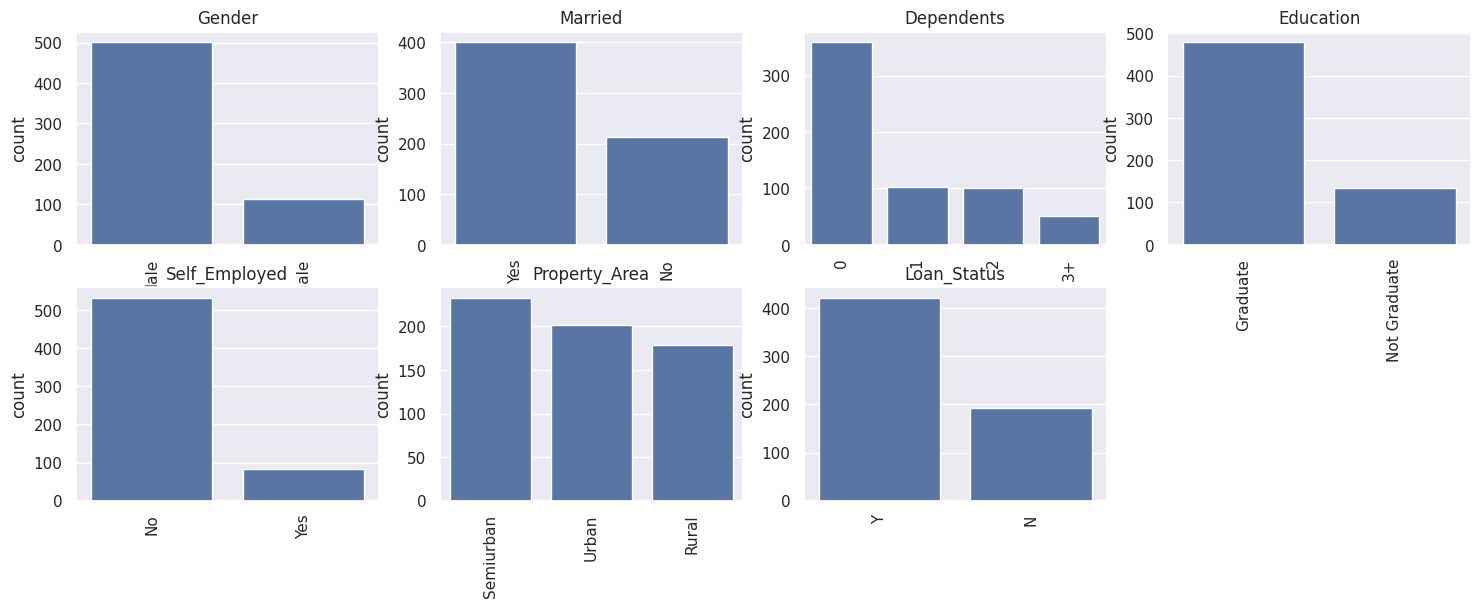

In [107]:

obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1
  
for col in object_cols:
  y = dataset[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y).set(title=col)
  index +=1


In [108]:
print("From the results above, the number of male applicants is higher compared to female applicants.")
print("The number of applicants that has been married is higher compared to applicants that hasn't married.") 
print("The number of applicants that has been graduated is higher compared to applicants that hasn't graduated.")
print("The number of applicants that are not self employed is higher compared to applicants that are self employed.")
print("The number of applicants that have good credit history is higher compared to applicants that have bad credit history.")
print("This column has a balanced distribution between Urban, Rural, and Semiurban property area.")
print("The number of approved loans is higher compared to rejected loans.")

From the results above, the number of male applicants is higher compared to female applicants.
The number of applicants that has been married is higher compared to applicants that hasn't married.
The number of applicants that has been graduated is higher compared to applicants that hasn't graduated.
The number of applicants that are not self employed is higher compared to applicants that are self employed.
The number of applicants that have good credit history is higher compared to applicants that have bad credit history.
This column has a balanced distribution between Urban, Rural, and Semiurban property area.
The number of approved loans is higher compared to rejected loans.


# Other Exploration
This section will show additional exploration from each variables. The additional exploration are:

Bivariate analysis (categorical w/ categorical, categroical w/ numerical, and numerical w/ numerical)

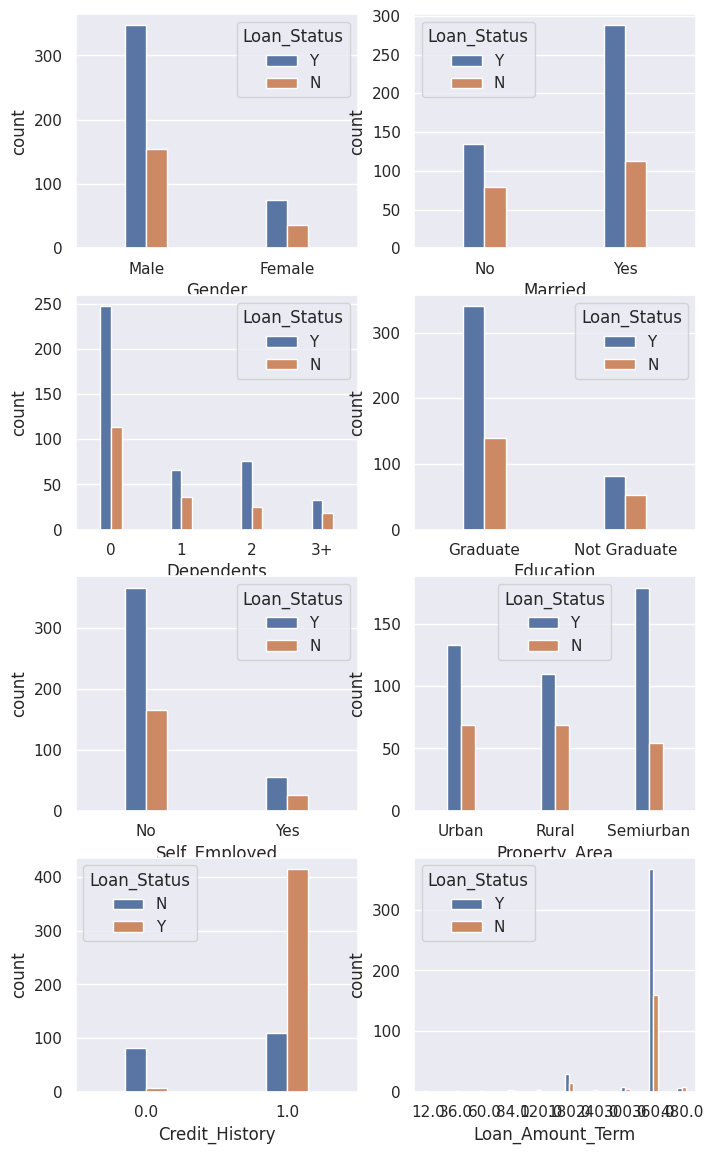

In [109]:
fig,axes=plt.subplots(4,2, figsize=(8,14))
for idx, col in enumerate(categorical_columns):
    row, column=idx//2, idx%2
    sns.countplot(x=col, data=dataset, ax=axes[row, column], hue='Loan_Status', width=0.3)

In [110]:
print("Most male applicants are already married compared to female applicants. Also, the number of not married male applicants are higher compare to female applicants that had not married.")
print("Most not self employed applicants have good credit compared to self employed applicants")
print("Most of loan that got accepted has property in Semiurban compared to Urban and Rural.")

Most male applicants are already married compared to female applicants. Also, the number of not married male applicants are higher compare to female applicants that had not married.
Most not self employed applicants have good credit compared to self employed applicants
Most of loan that got accepted has property in Semiurban compared to Urban and Rural.


It can be seen that there are lots of outliers in Applicant Income, and the distribution also positively skewed


/tmp/ipykernel_1166320/2112592599.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=dataset, palette="mako");


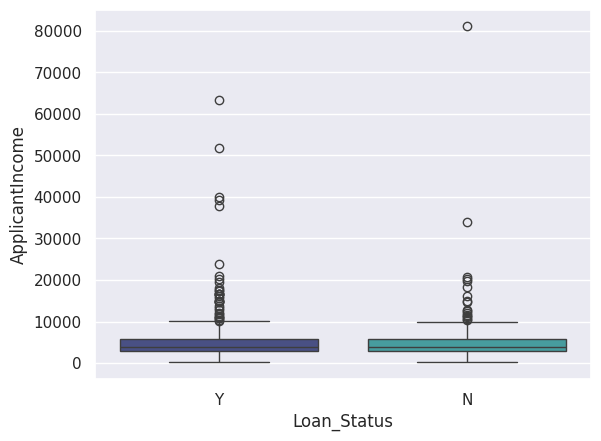

In [111]:
#Categorical - Numerical 
print("It can be seen that there are lots of outliers in Applicant Income, and the distribution also positively skewed")
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=dataset, palette="mako");

It's clear that Co Applicant Income has a number of outliers, and the distribution is also positively skewed.


/tmp/ipykernel_1166320/2699108149.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=dataset, palette="rocket");


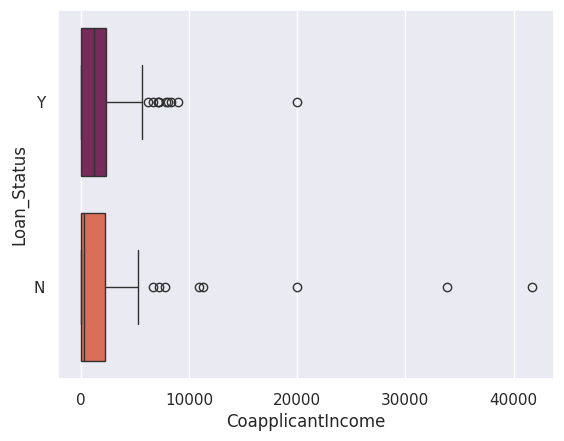

In [112]:
print("It's clear that Co Applicant Income has a number of outliers, and the distribution is also positively skewed.")
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=dataset, palette="rocket");

As can be seen, Co Applicant Income has a high number of outliers, and the distribution is also positively skewed.


/tmp/ipykernel_1166320/861112214.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Loan_Status", y="LoanAmount", data=dataset, palette="YlOrBr");


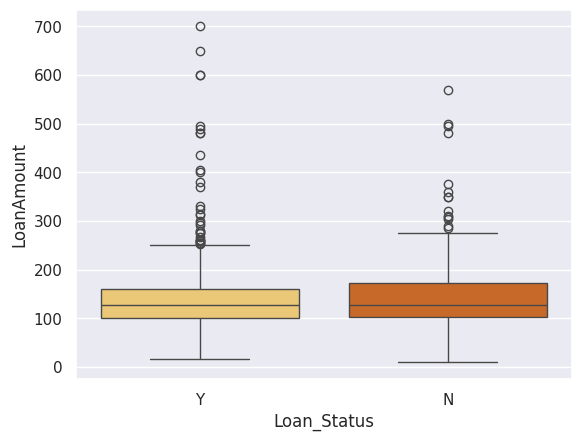

In [113]:
print("As can be seen, Co Applicant Income has a high number of outliers, and the distribution is also positively skewed.")
sns.boxplot(x="Loan_Status", y="LoanAmount", data=dataset, palette="YlOrBr");

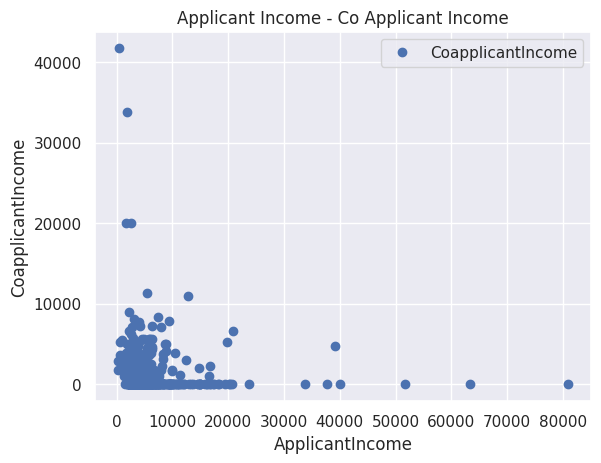

Pearson correlation: -0.11660458122889966
T Test and P value: 
 TtestResult(statistic=13.835753259915665, pvalue=1.460983948423972e-40, df=1226.0)
There is negative correlation between Applicant income and Co Applicant Income.
The correlation coefficient is significant at the 95 per cent confidence interval, as it has a p-value of 1.46


In [114]:
#Numerical - Numerical
dataset.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')  
plt.title('Applicant Income - Co Applicant Income')  
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')  
plt.show()
print('Pearson correlation:', dataset['ApplicantIncome'].corr(dataset['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(dataset['ApplicantIncome'], dataset['CoapplicantIncome']))

print("There is negative correlation between Applicant income and Co Applicant Income.")
print("The correlation coefficient is significant at the 95 per cent confidence interval, as it has a p-value of 1.46")

In [115]:
# Import label encoder
from sklearn import preprocessing
    
# label_encoder object knows how 
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (dataset.dtypes == 'object')
for col in list(obj[obj].index):
  dataset[col] = label_encoder.fit_transform(dataset[col])

There is positive correlation between Loan Amount and Applicant Income. It also shows that Credit_History has a high impact on Loan_Status.


<Axes: >

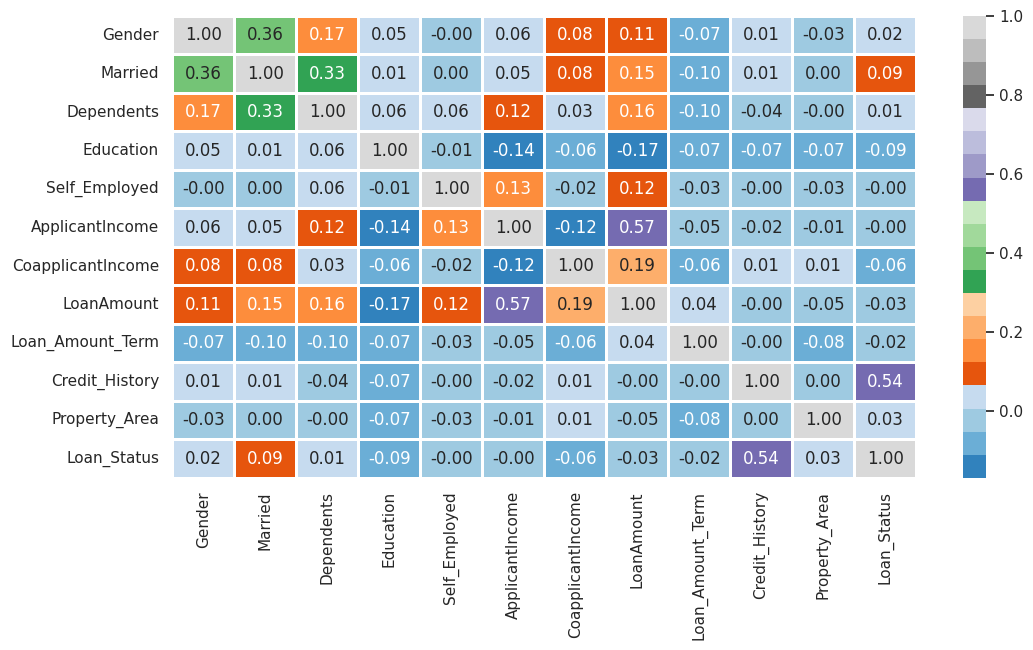

In [120]:
print("There is positive correlation between Loan Amount and Applicant Income. It also shows that Credit_History has a high impact on Loan_Status.")
plt.figure(figsize=(12,6))
  
sns.heatmap(dataset.corr(),cmap='tab20c',fmt='.2f',
            linewidths=2,annot=True)


As can be seen from the results, the 360 days loan duration is the most popular compared to others.


/tmp/ipykernel_1166320/2796307793.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Loan_Amount_Term", data=dataset, palette="Paired")


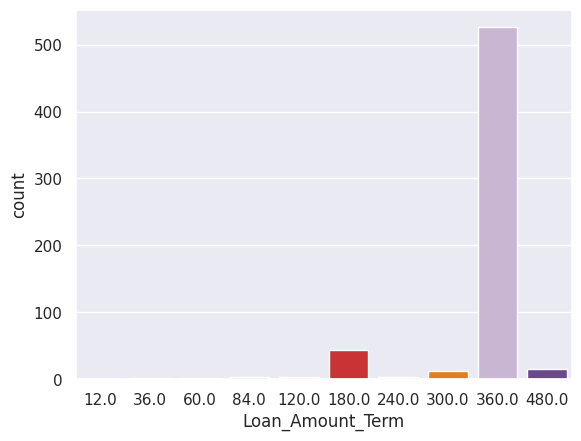

In [121]:
print("As can be seen from the results, the 360 days loan duration is the most popular compared to others.")
sns.countplot(x="Loan_Amount_Term", data=dataset, palette="Paired")
plt.show()

In [122]:
# Numerical Variable/Describe Numerical Variable [This section will show mean, count, std, min, max and others using describe function.]
dataset[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443
std,6109.041673,2926.248369,84.107233
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.250000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,164.750000
max,81000.000000,41667.000000,700.000000


# Distribution of Numerical Variable 
In this section, I will show the distribution of numerical variable using histogram and violin plot.

# Histogram Distribution



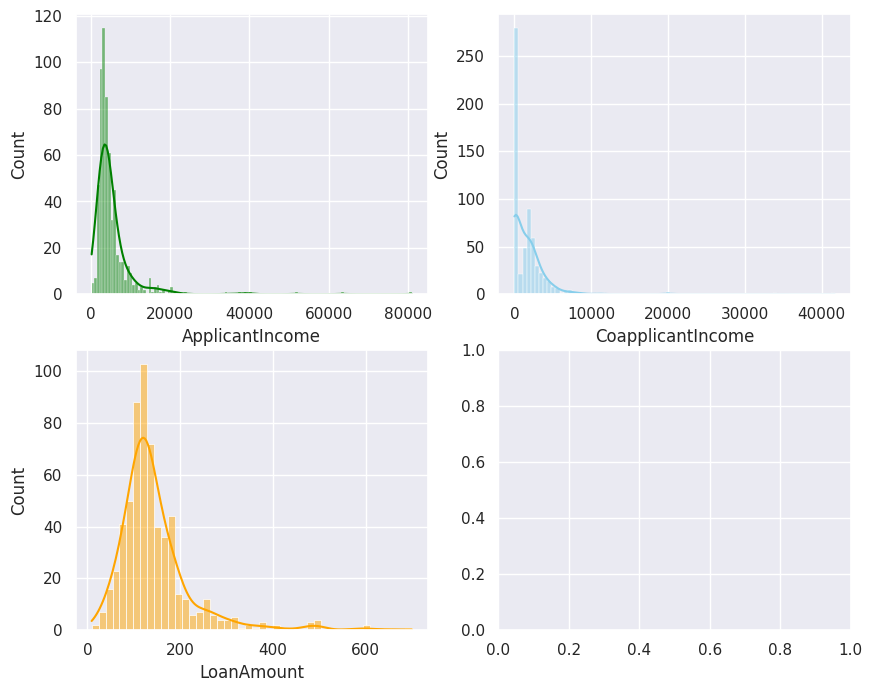

In [123]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=dataset, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=dataset, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=dataset, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

In [124]:
print("The distribution of Applicant income, Co Applicant Income, and Loan Amount are positively skewed and it has outliers (can be seen from histogram.")

The distribution of Applicant income, Co Applicant Income, and Loan Amount are positively skewed and it has outliers (can be seen from histogram.


<Figure size 2400x1600 with 0 Axes>

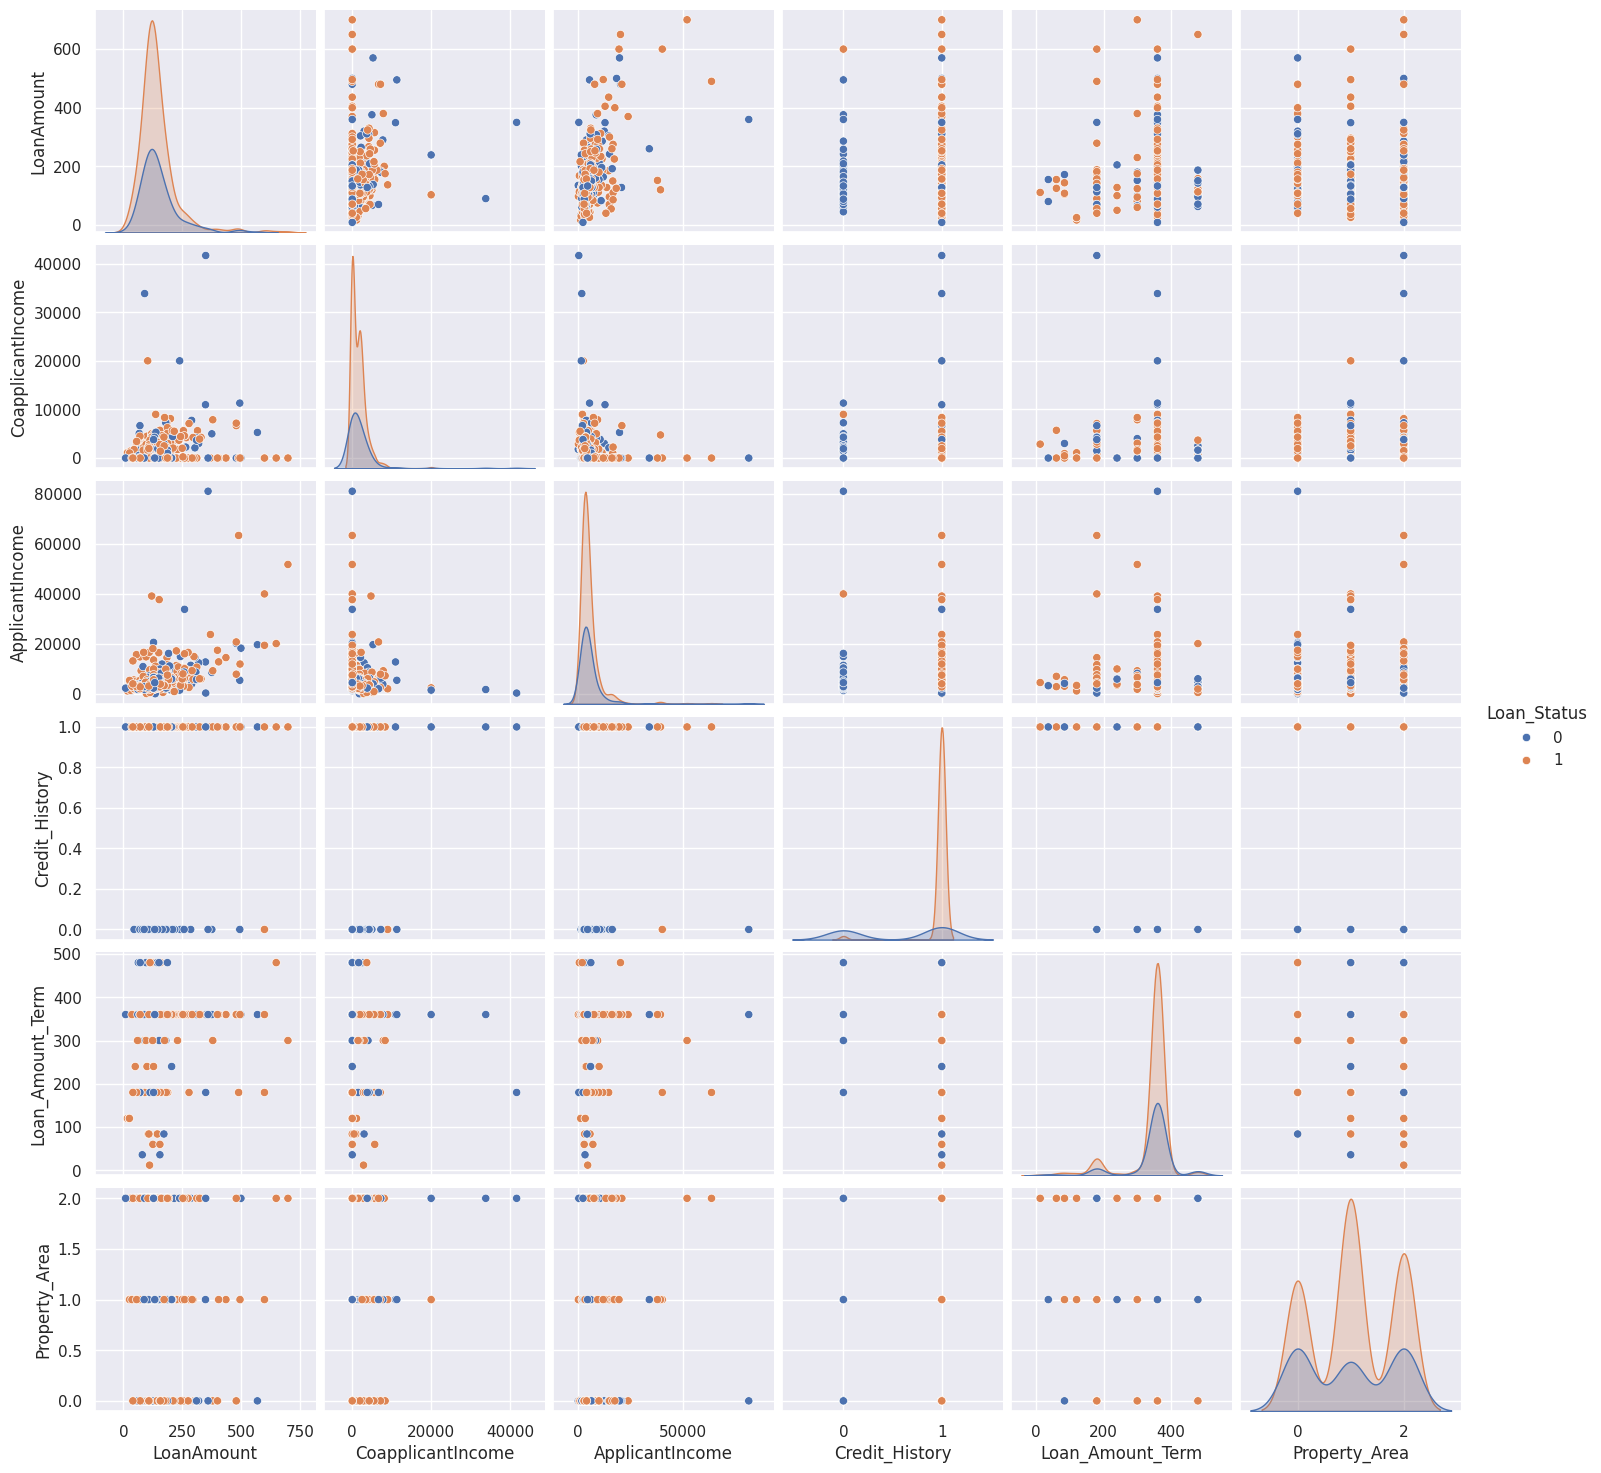

In [125]:
#dataset=sns.load_dataset("Loan_Status")
plt.figure(figsize=(12,8), dpi=200)
sns.pairplot(dataset, hue="Loan_Status",vars=['LoanAmount', 'CoapplicantIncome','ApplicantIncome','Credit_History','Loan_Amount_Term','Property_Area'])
#pairplot(dataset,{ hue: "Loan_Status" },vars=['LoanAmount', 'CoapplicantIncome','ApplicantIncome','Credit_History','Loan_Amount_Term','Property_Area'])

In [126]:
#Features Separating
#Dependent features (Loan_Status) will be seperated from independent features.
X=dataset.drop(["Loan_Status"],axis=1)
y=dataset["Loan_Status"]

In [134]:
#Splitting Data Set
#The data set will be split into 80% train and 20% test.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.20, random_state = 0)

In [135]:
#create our model decision tree classifer
model=DecisionTreeClassifier()

In [136]:
# fit our model
score=model.fit(X_train, y_train)

In [137]:
#base predication or default
based_preds=score.predict(X_test)

In [138]:
#now i have may prediction and if have my prediction is just list loan status which make sense but what i want do to compare the correct answer which is y_test
based_preds
#y_test

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [169]:
model.score(X_train, y_train) #training result predict 100% -the model is overfitting

1.0

In [170]:
model.score(X_test ,y_test)  #Testing result .75%

0.7398373983739838

In [171]:
#let's evaluation is classification import plot confusion metrics
#from sklearn.metrics import plot_confusion_matrix
print(classification_report(y_test, based_preds))

              precision    recall  f1-score   support

           0       0.57      0.63      0.60        38
           1       0.83      0.79      0.81        85

    accuracy                           0.74       123
   macro avg       0.70      0.71      0.70       123
weighted avg       0.75      0.74      0.74       123



# Initial Model is Overfitting:

Training Score: model.score(X_train, y_train) = 1.0 (100% accuracy)

Testing Score: model.score(X_test, y_test) = 0.7398373983739838 (73.98% accuracy)

# Observations:

The perfect score on the training data but significantly lower accuracy on the testing data is a clear indication of overfitting. The model has learned the training data too well, including noise and specific patterns that do not generalize to unseen data.

In [188]:
#we can plot out confustion matrix visually.confustionis going to take out model itself, X_test and y_test.plot_confusion_matrix taking fit model, X_test and y_test to compare it.
# One of the strong benefit using Decision Tree learning model , it very interpetable by human and it come with alot attributes once it fitted.we call model feature importances, run that it report back relative import of the features in the decision making
model.feature_importances_

array([0.00604444, 0.01146688, 0.03772879, 0.01538864, 0.0159847 ,
       0.25738749, 0.11547916, 0.17669715, 0.03815526, 0.29026574,
       0.03540175])

In [189]:
# this list importance in the order X features, if we look at 
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [190]:
# let's use Data frame
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature Importance']).sort_values('Feature Importance')
#pd.Dataframe(index=X.columns, data=model.feature_importances_, columns=['Feature Importance']).sort_values('Feature Importance')

,Feature Importance
Gender,0.006044
Married,0.011467
Education,0.015389
Self_Employed,0.015985
Property_Area,0.035402
Dependents,0.037729
Loan_Amount_Term,0.038155
CoapplicantIncome,0.115479
LoanAmount,0.176697
ApplicantIncome,0.257387


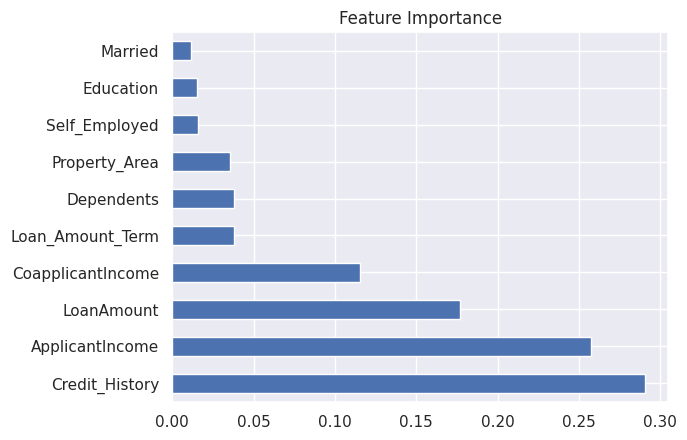

The results of the model shows/display the variable importance of our trained model.The Credit History, applicant Income,Loan Amount, Coapplicant Income and   seems to be the most important feature, followed by Dependents, Loan Amount Term and property Area


In [191]:

#print(clf.feature_importances_) #use inbuilt class feature_importances
X_columns = dataset.drop(["Loan_Status"],axis=1)
feat_importances = pd.Series(model.feature_importances_, index=X_columns.columns)
#plot graph of feature importances for better visualization
feat_importances.nlargest(10).plot(kind='barh', title='Feature Importance')
pyplot.show()

print("The results of the model shows/display the variable importance of our trained model.The Credit History, applicant Income,Loan Amount, Coapplicant Income and   seems to be the most important feature, followed by Dependents, Loan Amount Term and property Area")

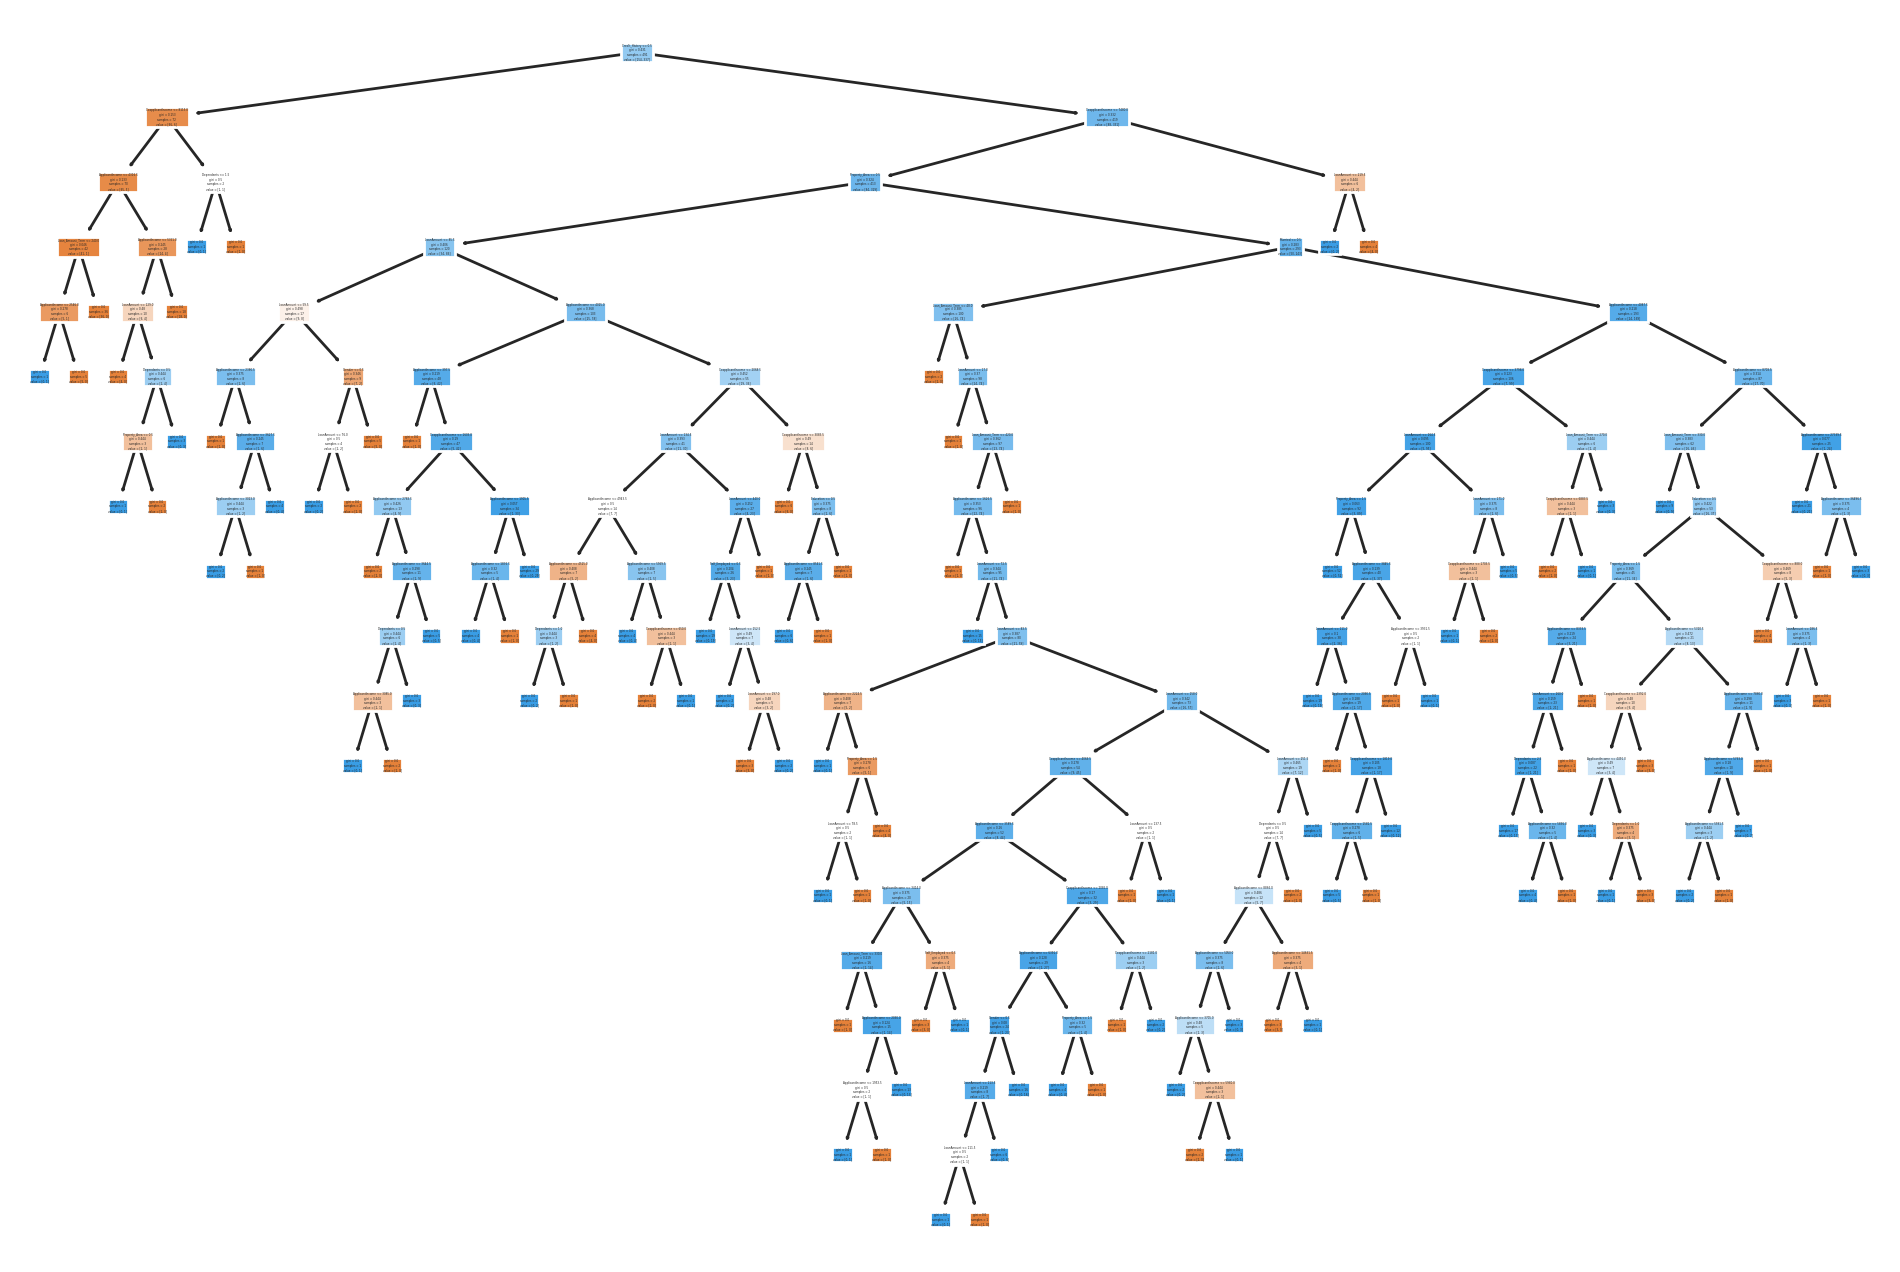

In [192]:
#in order visualize what is going we can use sklearn.
#from sklearn.tree import plot_tree
#plt.figure(figsize=(12,8), dpi=200)
#plot_tree(model, feature_names=X.columns, filled=True);

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8), dpi=200)
plot_tree(model, feature_names=list(X.columns), filled=True)
plt.show()

In [193]:
#this confine function to report back the model , will diff model with diff as we play with hyperparamets, let us set up this function, 
def report_model(model): 		# set up function,take a model, we will create new model diff hyperparamets
    model_preds=model.predict(X_test)  #
    print(classification_report(y_test, model_preds)) 
    print('\n')
    plt.figure(figsize=(12,8), dpi=200)
    #plot_tree(model, feature_names=X.columns, filled=True);
    #plot_tree(model, feature_names=X.columns, filled=True)
    plot_tree(model, feature_names=list(X.columns), filled=True);

              precision    recall  f1-score   support

           0       0.57      0.63      0.60        38
           1       0.83      0.79      0.81        85

    accuracy                           0.74       123
   macro avg       0.70      0.71      0.70       123
weighted avg       0.75      0.74      0.74       123





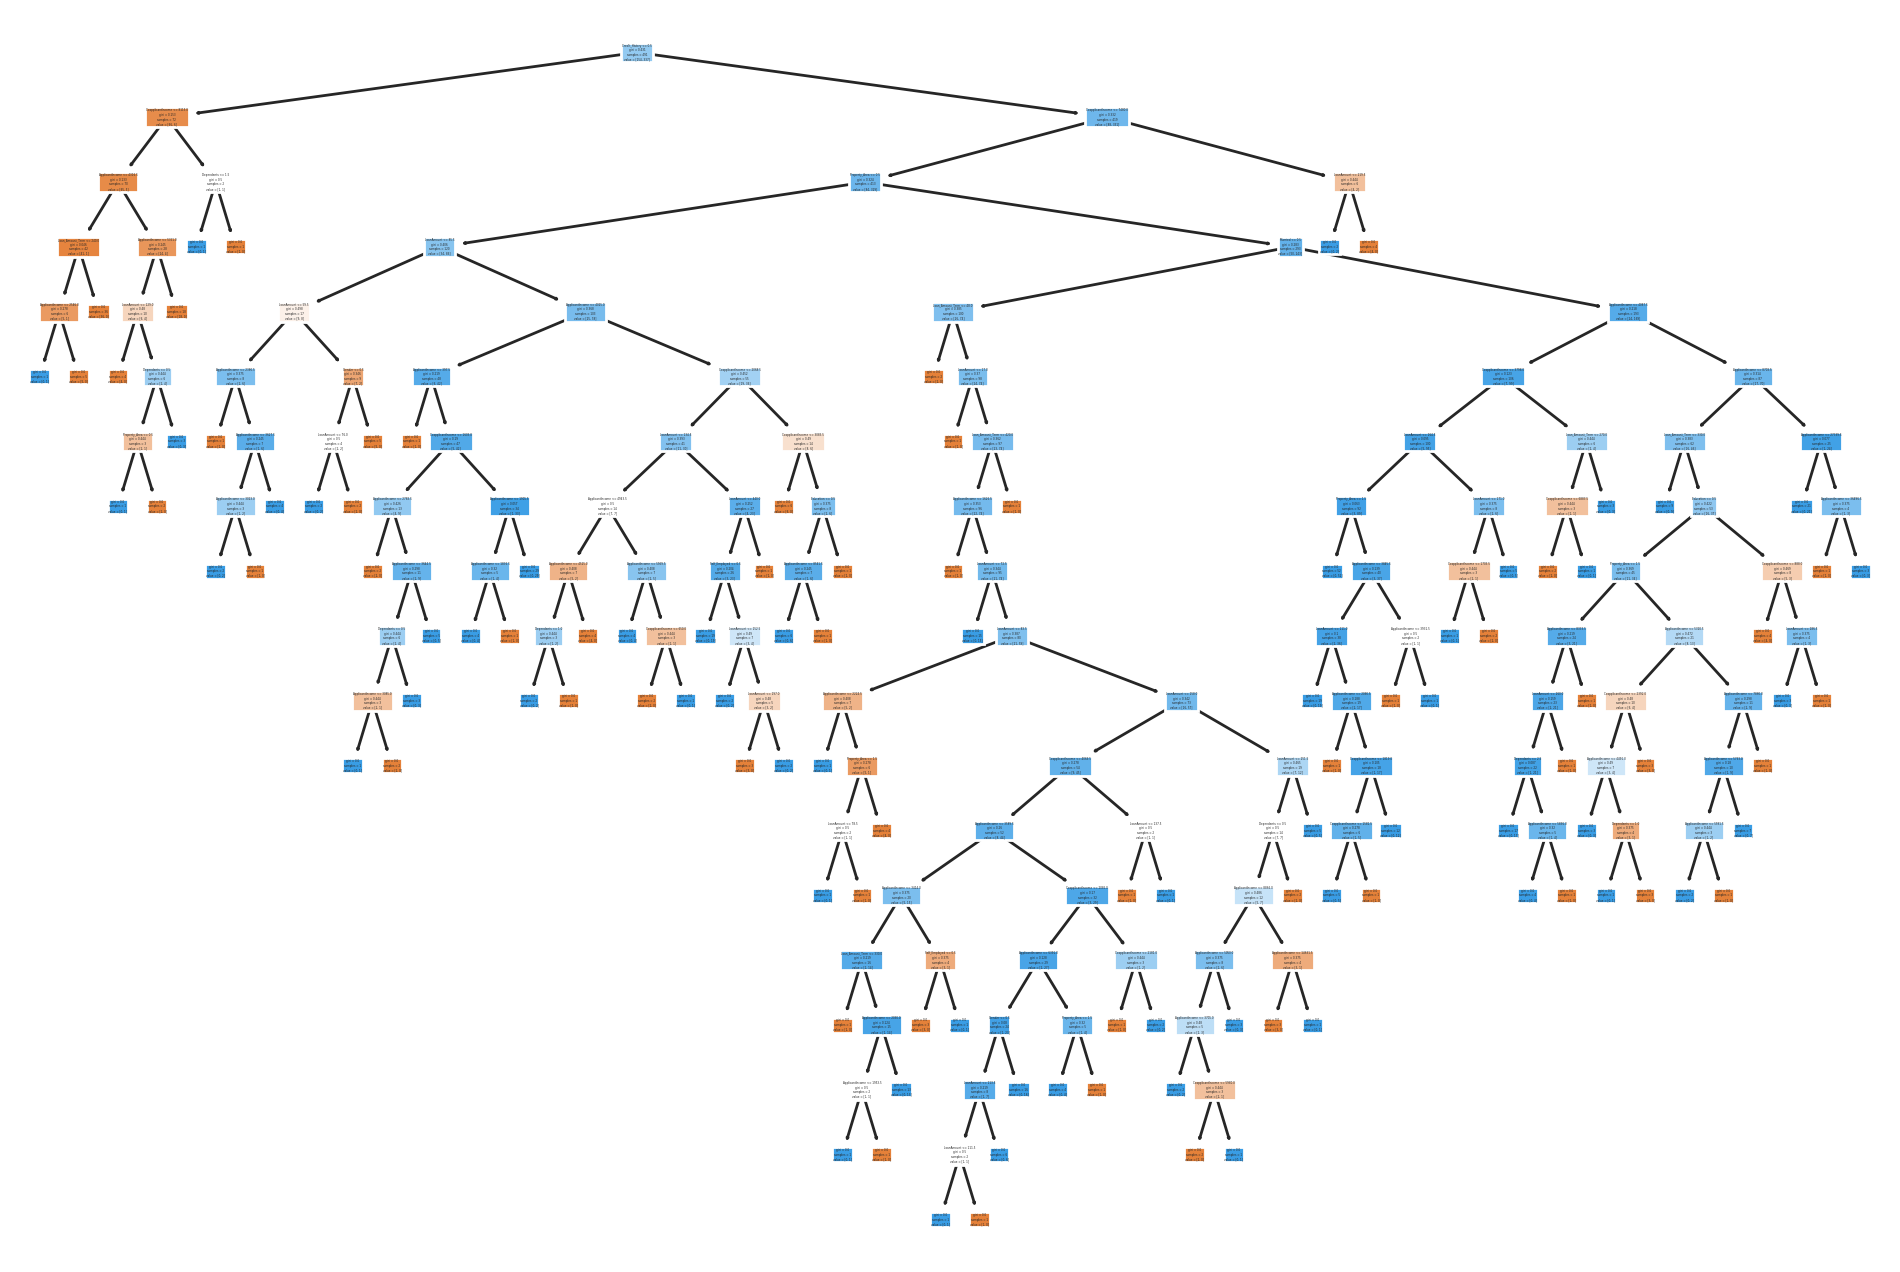

In [194]:
report_model(model)

In [197]:
# too big this tree and overfitting :#PRUNING THE CLASSIFICATION DECISION TREE
pruned_tree=DecisionTreeClassifier(max_depth=3)# change 2 to 3 or 13 does not mean it show 13 , it can only go to max

In [198]:
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

              precision    recall  f1-score   support

           0       0.89      0.42      0.57        38
           1       0.79      0.98      0.87        85

    accuracy                           0.80       123
   macro avg       0.84      0.70      0.72       123
weighted avg       0.82      0.80      0.78       123





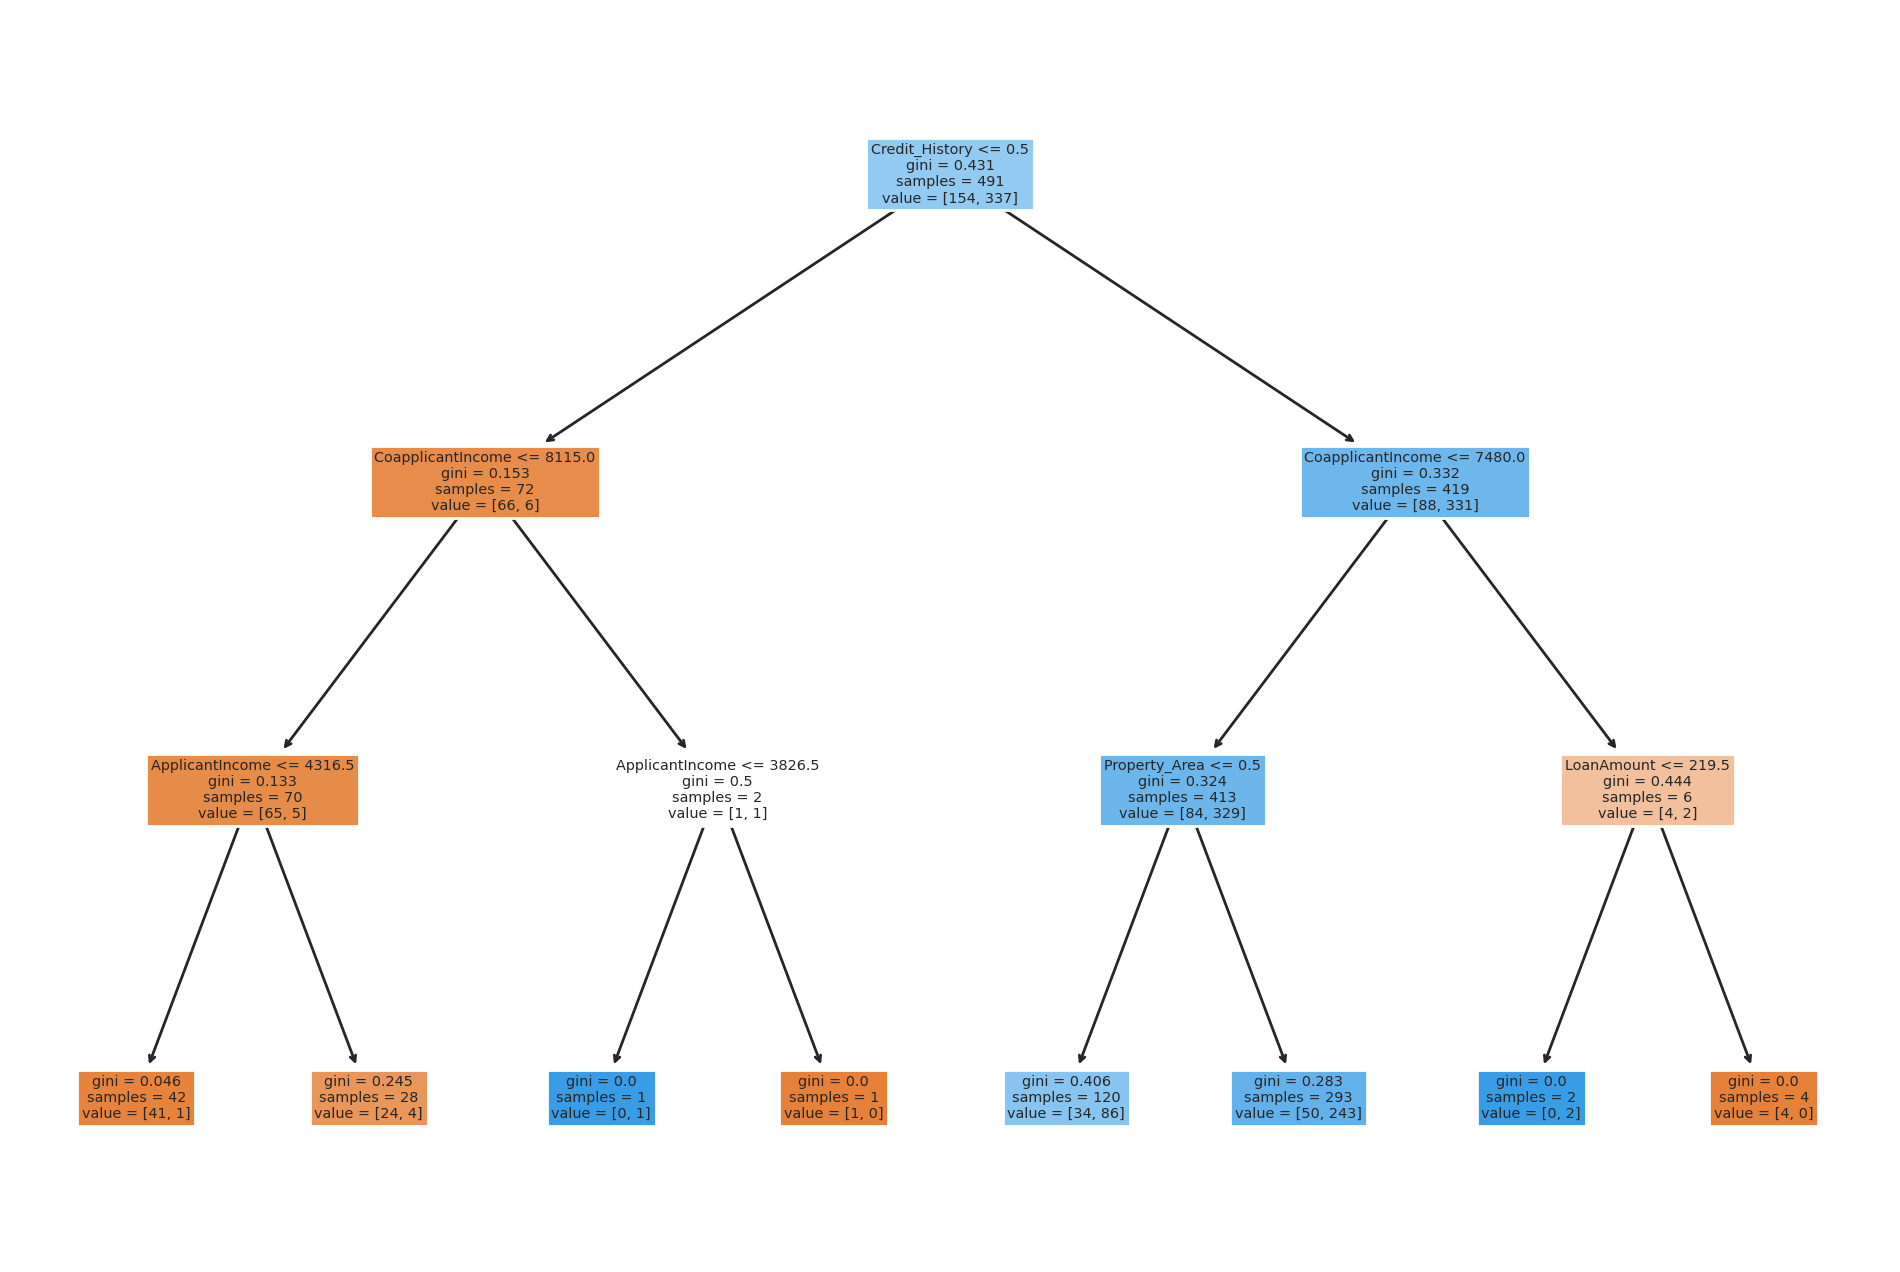

In [199]:
report_model(pruned_tree)

In [200]:
max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes=3)

In [201]:
max_leaf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

In [202]:
DecisionTreeClassifier(max_leaf_nodes=3)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

           0       0.85      0.45      0.59        38
           1       0.80      0.96      0.87        85

    accuracy                           0.80       123
   macro avg       0.82      0.71      0.73       123
weighted avg       0.81      0.80      0.78       123





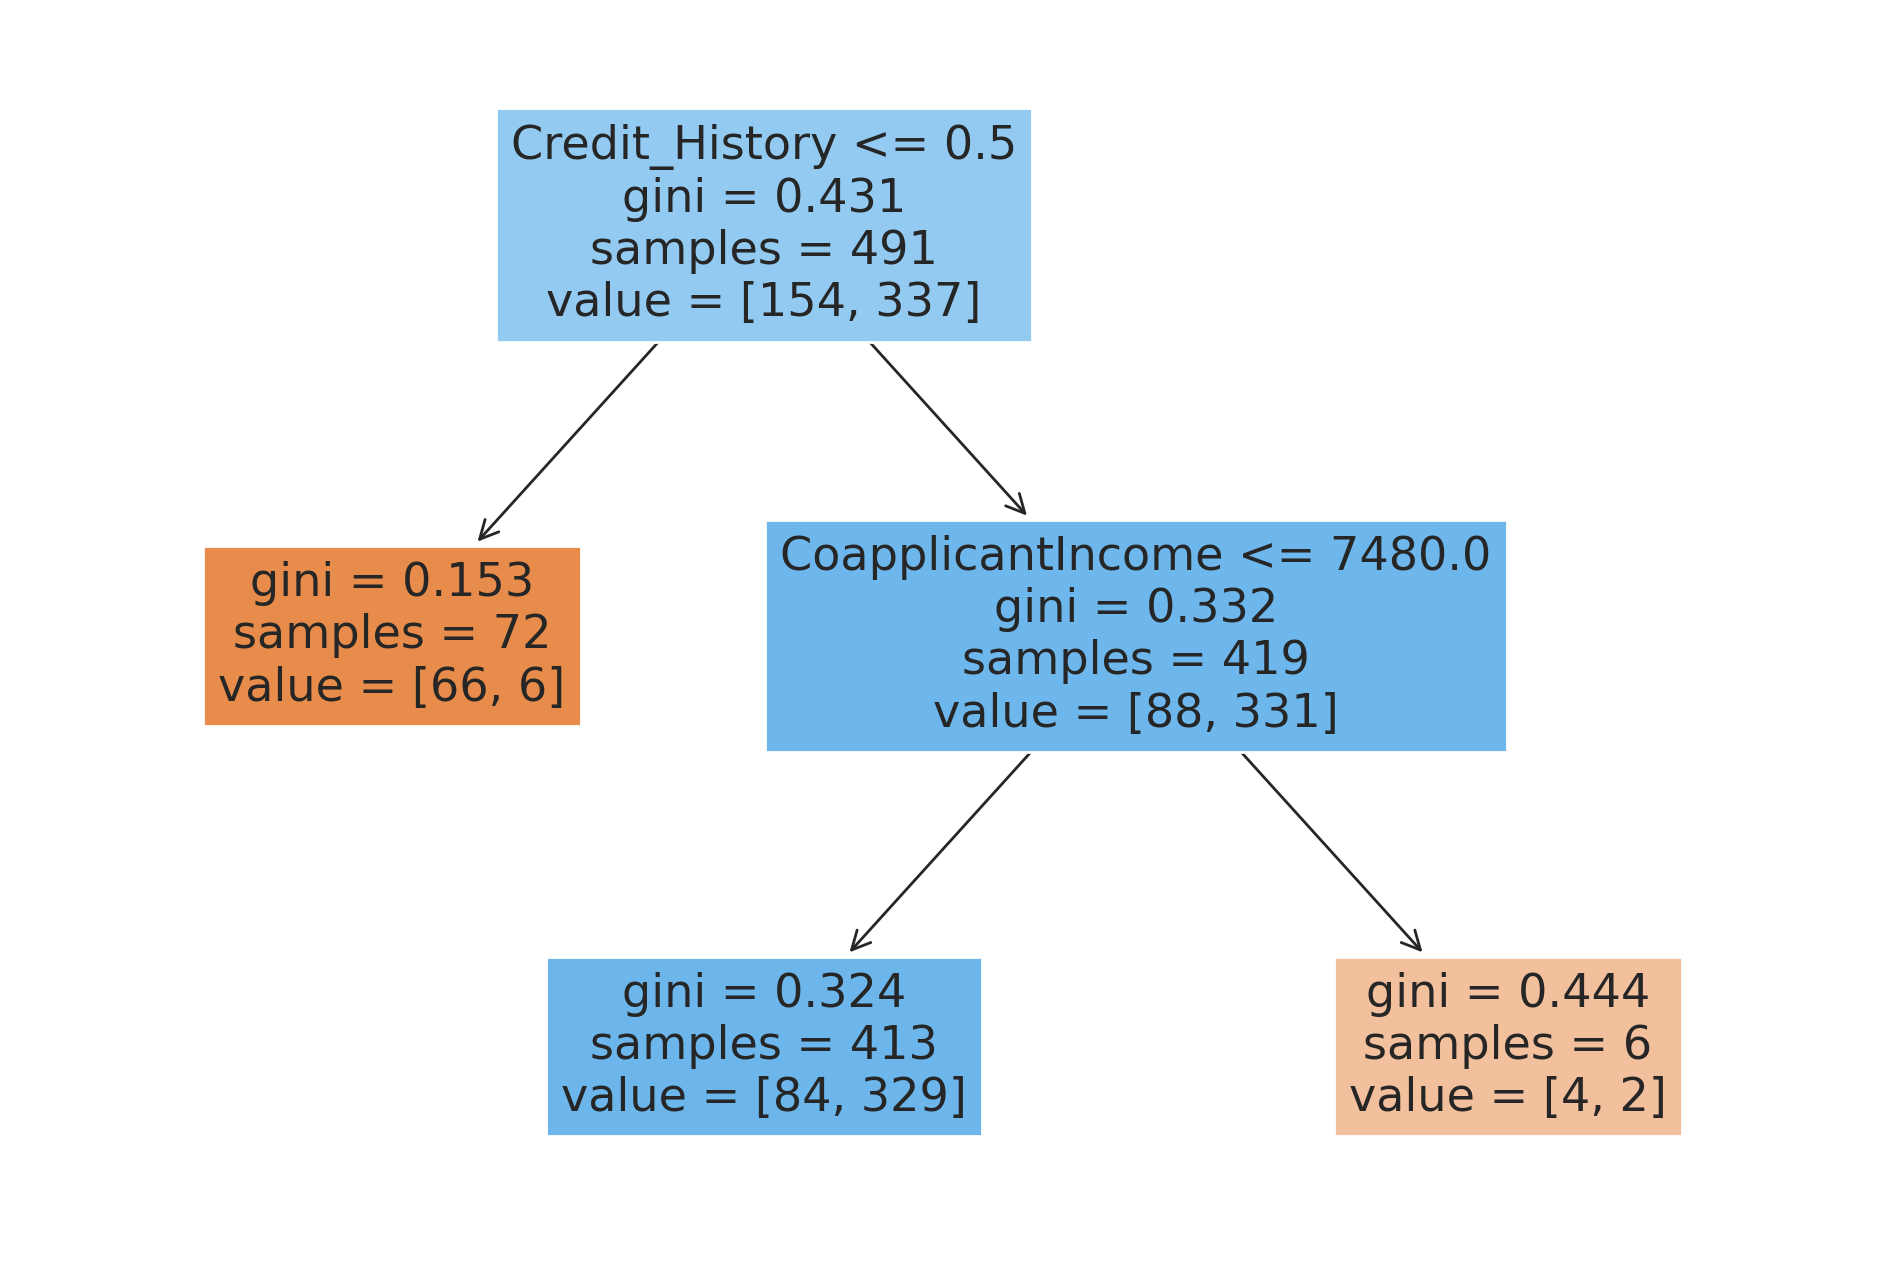

In [203]:
report_model(max_leaf_tree)

In [204]:
max_leaf_tree.score(X_train, y_train)

0.8126272912423625

In [205]:
max_leaf_tree.score(X_test, y_test)

0.8048780487804879

# Pruned Model(max_leaf_tree):

The iterative pruning process seems to be effectively reducing overfitting while maintaining reasonable accuracy on unseen data.

Training Score (81.26%)
The accuracy on the training data has decreased from 100% to 81.26% after pruning. This reduction is expected as the tree becomes simpler and less prone to capturing noise or specific patterns in the training set.
Testing Score (80.49%)
The testing accuracy remains relatively stable compared to the previous pruning iteration.

Analysis of Refinement

Fine-Tuning slightly increase in training score and the stable testing score suggest that the adjustments made during this pruning iteration might have fine-tuned the balance between bias and variance. The model is still generalizing well to unseen data while potentially capturing slightly more information from the training set.